In [1]:
from google.colab import files
uploaded = files.upload()


Saving data2.csv to data2.csv


In [63]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("data2.csv")

# Show the first 5 rows
df.head(10)


,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,42509,3515418493460774,07/25,251,1
1,DOCTOR,80334,213134223583196,05/32,858,1
2,LAWYER,91552,4869615013764888,03/30,755,1
3,LAWYER,43623,341063356109385,01/29,160,1
4,DOCTOR,22962,4707418777543978402,11/30,102,0
5,ENGINEER,72106,4483533221713,05/27,834,0
6,DOCTOR,54992,348781654665997,06/30,207,0
7,LAWYER,19996,38608157332988,12/26,433,0
8,DOCTOR,54682,4495934016931879,01/32,872,0
9,DOCTOR,74679,30107450695256,09/34,295,0


In [64]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [65]:
df.describe()

,Income,Credit_card_number,Security_code,Fraud
count,10000.00000,1.000000e+04,10000.000000,10000.000000
mean,49761.20600,3.851363e+17,863.587800,0.501600
std,28837.72928,1.257950e+18,1484.424959,0.500022
min,1.00000,6.040296e+10,0.000000,0.000000
25%,24863.75000,1.800137e+14,275.000000,0.000000
50%,49483.00000,3.512440e+15,539.500000,1.000000
75%,74483.00000,4.594779e+15,813.250000,1.000000
max,99986.00000,4.999697e+18,9990.000000,1.000000


In [66]:
df.dtypes

,0
Profession,object
Income,int64
Credit_card_number,int64
Expiry,object
Security_code,int64
Fraud,int64


In [68]:
# To know is there any missing value in the dataset.
df.isnull().sum()

,0
Profession,0
Income,0
Credit_card_number,0
Expiry,0
Security_code,0
Fraud,0


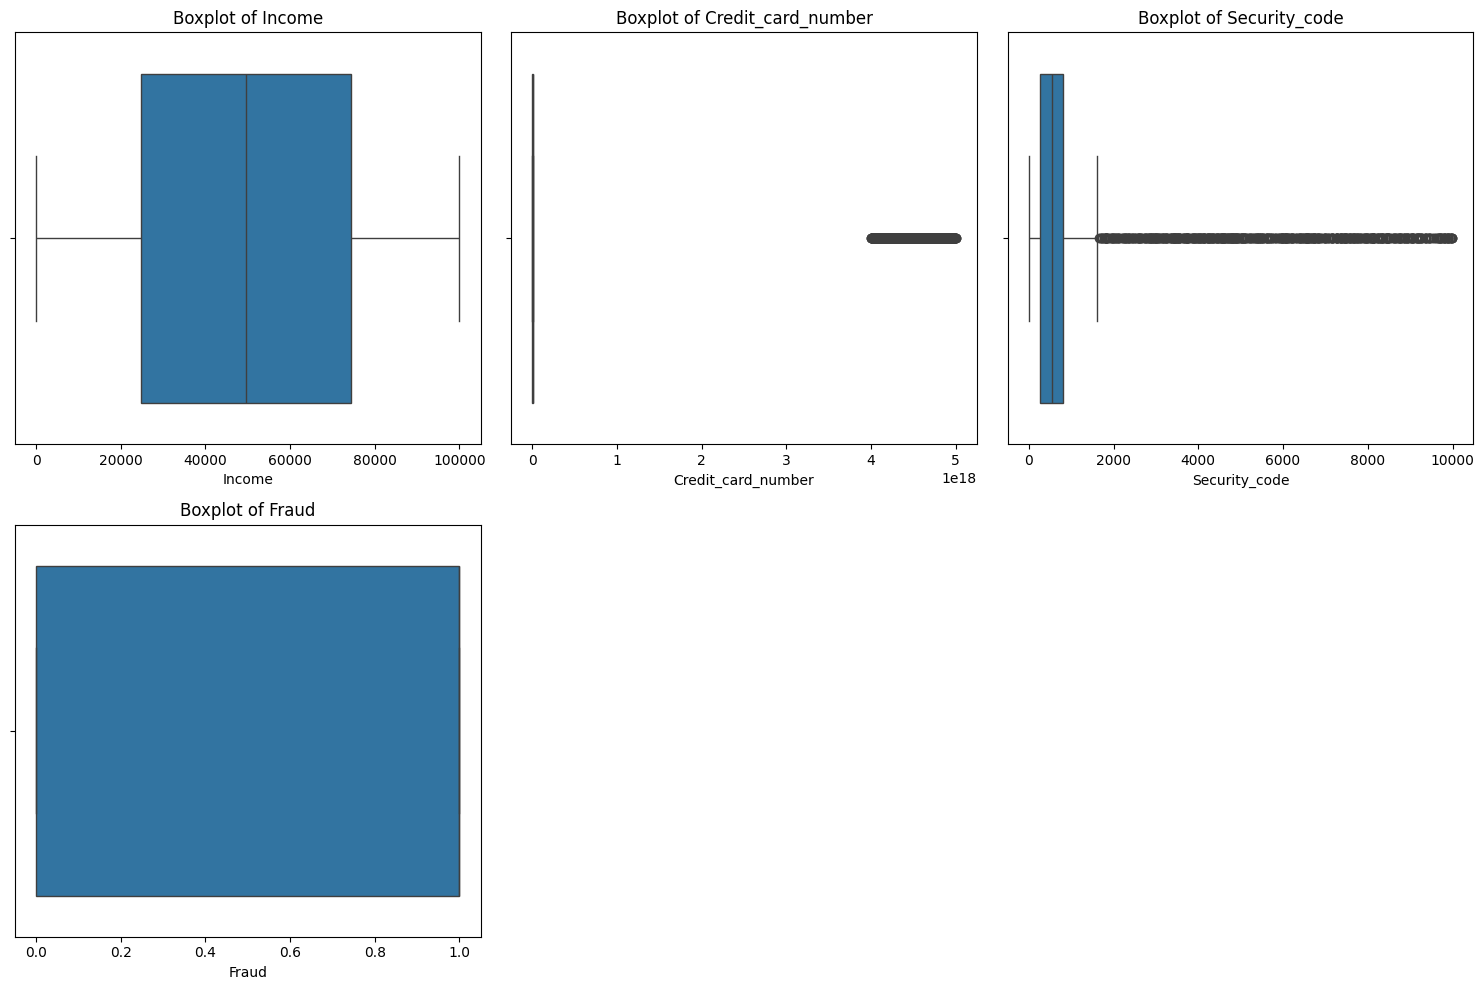

In [69]:
# To find out is there any outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numeric column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [70]:
# Normalization of numerical Columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head(10)


,Profession,Income,Credit_card_number,Expiry,Security_code,Fraud
0,DOCTOR,0.425144,7.031142e-04,07/25,0.025125,1.0
1,DOCTOR,0.803451,4.261734e-05,05/32,0.085886,1.0
2,LAWYER,0.915647,9.739699e-04,03/30,0.075576,1.0
3,LAWYER,0.436285,6.820472e-05,01/29,0.016016,1.0
4,DOCTOR,0.229644,9.415407e-01,11/30,0.010210,0.0
5,ENGINEER,0.721158,8.846796e-07,05/27,0.083483,0.0
6,DOCTOR,0.549992,6.974847e-05,06/30,0.020721,0.0
7,LAWYER,0.199980,7.710018e-06,12/26,0.043343,0.0
8,DOCTOR,0.546892,8.992292e-04,01/32,0.087287,0.0
9,DOCTOR,0.746892,6.009773e-06,09/34,0.029530,0.0


In [71]:
# Normalization of Catagorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns: ", categorical_columns)

Categorical Columns:  Index(['Profession', 'Expiry'], dtype='object')


In [31]:
# Convert ExpiryDate to datetime first
df['Expiry'] = pd.to_datetime(df['Expiry'], errors='coerce')

# Then check again for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Profession'], dtype='object')


In [37]:
data_encoded = pd.get_dummies(df, columns=categorical_columns)
data_encoded.head(10)

,Income,Credit_card_number,Expiry,Security_code,Fraud,Profession_DOCTOR,Profession_ENGINEER,Profession_LAWYER
0,0.425144,7.031142e-04,NaT,0.025125,1.0,True,False,False
1,0.803451,4.261734e-05,2032-05-01,0.085886,1.0,True,False,False
2,0.915647,9.739699e-04,NaT,0.075576,1.0,False,False,True
3,0.436285,6.820472e-05,NaT,0.016016,1.0,False,False,True
4,0.229644,9.415407e-01,NaT,0.010210,0.0,True,False,False
5,0.721158,8.846796e-07,NaT,0.083483,0.0,False,True,False
6,0.549992,6.974847e-05,NaT,0.020721,0.0,True,False,False
7,0.199980,7.710018e-06,NaT,0.043343,0.0,False,False,True
8,0.546892,8.992292e-04,2032-01-01,0.087287,0.0,True,False,False
9,0.746892,6.009773e-06,2034-09-01,0.029530,0.0,True,False,False


In [48]:
# Convert all boolean columns (True/False) to integers (1/0)
bool_cols = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)
data_encoded.head(10)


,Income,Credit_card_number,Expiry,Security_code,Fraud,Profession_DOCTOR,Profession_ENGINEER,Profession_LAWYER
0,0.425144,7.031142e-04,NaT,0.025125,1.0,1,0,0
1,0.803451,4.261734e-05,2032-05-01,0.085886,1.0,1,0,0
2,0.915647,9.739699e-04,NaT,0.075576,1.0,0,0,1
3,0.436285,6.820472e-05,NaT,0.016016,1.0,0,0,1
4,0.229644,9.415407e-01,NaT,0.010210,0.0,1,0,0
5,0.721158,8.846796e-07,NaT,0.083483,0.0,0,1,0
6,0.549992,6.974847e-05,NaT,0.020721,0.0,1,0,0
7,0.199980,7.710018e-06,NaT,0.043343,0.0,0,0,1
8,0.546892,8.992292e-04,2032-01-01,0.087287,0.0,1,0,0
9,0.746892,6.009773e-06,2034-09-01,0.029530,0.0,1,0,0


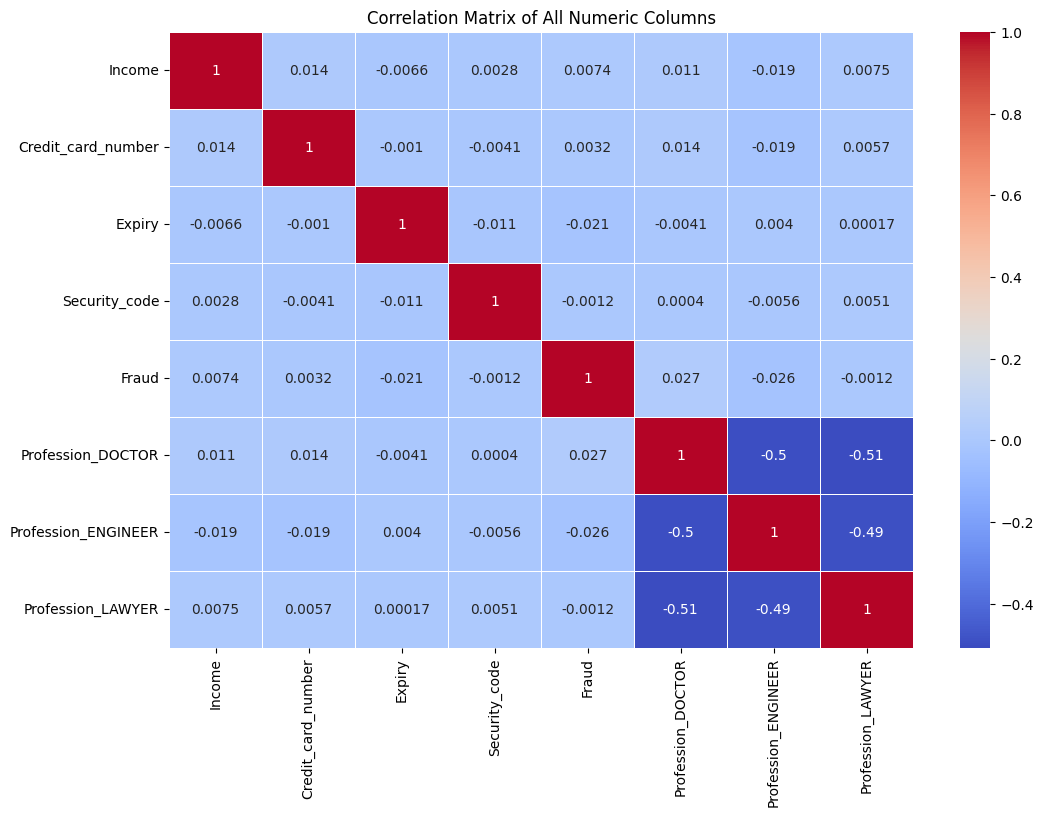

In [49]:
# Calculate correlation for all numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation for all numeric columns
corr_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of All Numeric Columns")
plt.show()


In [58]:
# Split the data into 70% training and 30% testing
from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns=['Fraud', 'Expiry'])   # Feature columns
y = data_encoded['Fraud']                # Target column

# Correct order: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (7000, 6)
Testing set shape: (3000, 6)


In [59]:
# Decision Tree Classifier
# 1️⃣ Import the library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2️⃣ Create the model
dt_model = DecisionTreeClassifier(random_state=42)

# 3️⃣ Train the model on training data
dt_model.fit(X_train, y_train)

# 4️⃣ Make predictions on test data
y_pred = dt_model.predict(X_test)

# 5️⃣ Evaluate the model
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.49333333333333335

📊 Confusion Matrix:
 [[724 752]
 [768 756]]

📈 Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.49      0.49      1476
         1.0       0.50      0.50      0.50      1524

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000



In [60]:
#Logistic Regression
# 1️⃣ Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2️⃣ Create the model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# 3️⃣ Train the model
log_model.fit(X_train, y_train)

# 4️⃣ Predict on test data
y_pred = log_model.predict(X_test)

# 5️⃣ Evaluate performance
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 0.5143333333333333

📊 Confusion Matrix:
 [[999 477]
 [980 544]]

📈 Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.68      0.58      1476
         1.0       0.53      0.36      0.43      1524

    accuracy                           0.51      3000
   macro avg       0.52      0.52      0.50      3000
weighted avg       0.52      0.51      0.50      3000



In [62]:
# Random Forest Classifier
# 1) Import
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2) Create the model (solid defaults)
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,        # let trees grow; you can try values like 5, 10, 20
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,             # use all CPUs
    random_state=42
)

# 3) Train
rf.fit(X_train, y_train)

# 4) Predict
y_pred = rf.predict(X_test)

# 5) Evaluate
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:\n", classification_report(y_test, y_pred))

✅ Random Forest Accuracy: 0.495

📊 Confusion Matrix:
 [[741 735]
 [780 744]]

📈 Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.50      0.49      1476
         1.0       0.50      0.49      0.50      1524

    accuracy                           0.49      3000
   macro avg       0.50      0.50      0.49      3000
weighted avg       0.50      0.49      0.50      3000

